# Project: Investigate a Dataset (FBI Gun data brief analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Data Description:
The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

>	The NICS data is found in one sheet of an .xlsx file. It contains the number of firearms checks by month, state, and type. 
>	The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year. 

>My reseach questions:

>Is poverty related to gun purchases patterns?

>What is the most popular gun type, and what are the implications of such?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# print current working directory
os.getcwd()

'/Users/A.R/Desktop/surfer366/1_Coding_HUB/NanoDegree'

In [3]:
census_data = pd.read_csv('/Users/A.R/Desktop/surfer366/1_Coding_HUB/NanoDegree/ncis-and-census-data/U.S. Census Data.csv')
census_data.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
census_data.shape

(85, 52)

## Observations
>This data has numeric values saved as strings, will need to extract it as dtype float, since some of the values are in percentage terms.
It would not be a wise idea to drop NA rows, since that presents 20% or more of the dataset
The 2nd column in the dataset could be deemed unnecessary

In [5]:
# dropping the second column of fact note
census_data.drop(columns=['Fact Note'], inplace=True) 

In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [7]:
type(census_data['Arizona'][0])

str

In [8]:
# which columns contain null values?
census_data.isnull().sum().values

array([ 5, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [9]:
# yeilds a different output to the usual summary statistics, since every column represents a different entity
census_data.describe()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,65,64,64,64,63,64,63,64,64,...,65,64,64,64,63,65,65,64,65,64
top,Native Hawaiian and Other Pacific Islander alo...,"26,039,632",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,51.10%,...,"""46""",0.048,50.40%,2.50%,1.90%,"110,002,385","$61,062",1.50%,8.20%,7.10%
freq,1,1,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [10]:
# check for duplicates in the dataset
census_data.duplicated().any()

True

In [11]:
census_data.drop_duplicates(inplace=True)
census_data.duplicated().sum()

0

In [12]:
# loop for excatrcing floats from all str columns and save changes

cols = census_data.iloc[:,1:].columns
for c in cols:
    census_data[c] = census_data[c].str.extract('(\d+)').astype(float)
    
# comfirm changes
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            80 non-null     object 
 1   Alabama         65 non-null     float64
 2   Alaska          64 non-null     float64
 3   Arizona         65 non-null     float64
 4   Arkansas        65 non-null     float64
 5   California      65 non-null     float64
 6   Colorado        65 non-null     float64
 7   Connecticut     65 non-null     float64
 8   Delaware        65 non-null     float64
 9   Florida         65 non-null     float64
 10  Georgia         65 non-null     float64
 11  Hawaii          64 non-null     float64
 12  Idaho           65 non-null     float64
 13  Illinois        65 non-null     float64
 14  Indiana         65 non-null     float64
 15  Iowa            65 non-null     float64
 16  Kansas          65 non-null     float64
 17  Kentucky        65 non-null     float

In [13]:
census_data.head(5)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4.0,741.0,6.0,2.0,39.0,5.0,3.0,952.0,20.0,...,865454.0,6651194.0,27.0,3.0,624.0,8.0,7.0,1.0,5.0,585.0
1,"Population estimates base, April 1, 2010, (V2...",4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,18.0,...,814195.0,6346298.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
2,"Population, percent change - April 1, 2010 (es...",1.0,4.0,8.0,2.0,5.0,10.0,0.0,6.0,9.0,...,0.0,0.0,10.0,10.0,0.0,5.0,8.0,1.0,1.0,3.0
3,"Population, Census, April 1, 2010",4.0,710.0,6.0,2.0,37.0,5.0,3.0,897.0,18.0,...,814180.0,6346105.0,25.0,2.0,625.0,8.0,6.0,1.0,5.0,563.0
4,"Persons under 5 years, percent, July 1, 2016, ...",6.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,...,0.0,0.0,7.0,8.0,4.0,6.0,6.0,5.0,5.0,6.0


In [14]:
# minus the 4 dropped duplicated rows
census_data.isna().sum().values

array([ 1, 16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 16, 16, 16,
       16, 16, 17, 16, 16, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 17, 16, 17])

In [15]:
# Replace the all NaN in df with 'Record NA' 
census_data.fillna('Record NA', inplace = True)

In [16]:
# Confirm changes 
census_data.isnull().any().any()

False

In [29]:
# to produce an array of the 81 facts/rows recorded for each state/column
#census_data['Fact'].unique()

for i, v in enumerate(census_data['Fact'].unique()):
    print(i, v)

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

## Analysis on the census data

In [23]:
# an interesting relationship to examine, is how poverty is related to gun purchases
#census_data[census_data['Fact'] == 'Persons in poverty, percent']


In [31]:
census_data.iloc[49,1:].max()

20.0

In [43]:
# The states with maximum poverty are Louisiana and Mississippi

census_data.iloc[49,1:] == 20

Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana          True
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi        True
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota      False
Tennessee       

In [44]:
# on the other hand the minimum poverty percent is, which is quite unrealistic
census_data.iloc[49,1:].min()

0.0

In [45]:
# will take New York and Tennessee
census_data.iloc[49,1:] == 0

Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico         True
New York           True
North Carolina     True
North Dakota       True
Ohio               True
Oklahoma           True
Oregon             True
Pennsylvania       True
Rhode Island       True
South Carolina     True
South Dakota       True
Tennessee       

########################################################################

In [46]:
gun_data = pd.read_excel('/Users/A.R/Desktop/surfer366/1_Coding_HUB/NanoDegree/ncis-and-census-data/gun_data.xlsx')
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [47]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [48]:
# to maintain consistency of dtypes of columns
gun_data[["multiple", "totals"]] = gun_data[["multiple", "totals"]].astype(float)

In [54]:
# check for duplicates
gun_data.duplicated().sum()

0

In [49]:
# Create a loop to fill NA values with the mean for each column 
col_ = gun_data.iloc[:, 2:].columns
for c in col_:
    c_mean = gun_data[c].mean()
    gun_data[c].fillna(c_mean, inplace = True)

In [50]:
# Confirm changes
gun_data.isnull().any().any()

False

In [51]:
# Convert the column 'month' from string into datatime dtype
gun_data.month = pd.to_datetime(gun_data['month'], errors='coerce')

In [52]:
# Confirm changes
type(gun_data['month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [153]:
# all good, dtypes wise
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is poverty related to gun purchasing patterns?)

In [56]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [62]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [70]:
# About 100,000 over the years, high poverty
Missi_ = gun_data[gun_data['state'] == 'Mississippi']
Missi_['permit'].sum()

99945.0

In [71]:
# New York has 8 folds more gun permits than Mississippi, low poverty
NY_ = gun_data[gun_data['state'] == 'New York']
NY_['permit'].sum()

804474.0

In [72]:
# About 90,000 in Louisiana, high poverty
Loui_ = gun_data[gun_data['state'] == 'Louisiana']
Loui_['permit'].sum()

90789.62940373967

In [ ]:
# Tennessee has 11 folds more gun permits than Tennessee, Low poverty
Tenn_ = gun_data[gun_data['state'] == 'Tennessee']
Tenn_['permit'].sum()

>It is safe to say that guns are treated as an accessory rather than a neccessity, hence, poorer regions tend to have extremely lower gun permits than rich regions.

>Another reason could possibly be the high costs associated with issuing a gun permit.

### Research Question 2  (What is the most popular type of gun across the states?)

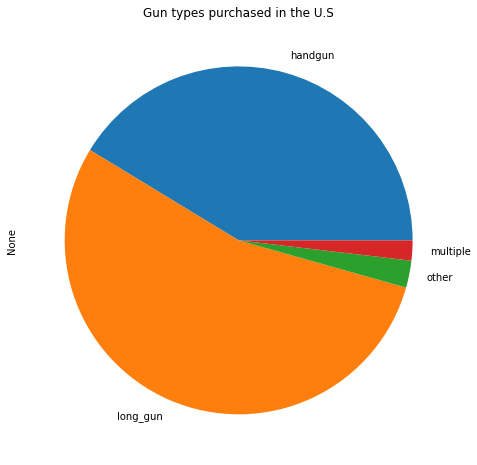

In [94]:
# long_gun a.k.a rifles seem to be the most preferred types of guns in the U.S. 
# probably because they are used for hunting game
gun_data.iloc[:,4:8].sum().plot(kind='pie', figsize=(8,8), title='Gun types purchased in the U.S');

<a id='conclusions'></a>
## Conclusion

> Peope in the U.S. purchase guns mostly for purposes of lesiure and sport
> Assuming that regions with high poverty numbers would have increased criminal activity and hence would require to purchase a gun for purposes of self defense; is an invalid argument. This is shown by a comparison between 4 American states.
> Limitations to this analysis would be the small scope of the study. In addition to not examining the change of purchase patterns along the dataset time period 

resources: 

https://www.pewresearch.org/social-trends/2017/06/22/guns-and-daily-life-identity-experiences-activities-and-involvement/

https://injuryprevention.bmj.com/content/6/4/263